In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("ai_adoption_dataset.csv")
df.head(10)

,country,industry,ai_tool,adoption_rate,daily_active_users,year,user_feedback,age_group,company_size
0,USA,Technology,ChatGPT,40.45,2461,2023,YyvLXOFyevRMSvJtkXodLvgejiqQNvSOZfeeJASDOVTxwm...,35-44,Startup
1,France,Manufacturing,Midjourney,35.72,8496,2024,AdFVhenjthYSKJNzxzfaGQk wLnjRCgrHTyfXQEFjFJCMO...,18-24,Enterprise
2,Australia,Transportation,ChatGPT,13.47,8641,2024,zgNPmXBICRNbpjpTqIUWmMTeTYsInDNtAmzuxpDvcUZEAi...,45-54,Startup
3,UK,Manufacturing,ChatGPT,48.46,3488,2023,LxeKzQFbPvhxXUSgPVlLLJ pUFaicjCgiMtAmsTjovkrdE...,45-54,Enterprise
4,UK,Agriculture,Stable Diffusion,34.06,1124,2024,IOQtQoSKdSmiXRsUKpjXjXZgQohymFkVUvOASXlEnVsIOS...,45-54,SME
5,Brazil,Education,Midjourney,64.54,3267,2024,PDkHPYQGOo XqLNwpEsZlbubUVBUDBujoPCWEDoCtcwzKX...,55+,Startup
6,USA,Healthcare,Bard,81.83,4265,2023,VXo RcPqLBqywVUcwrpjmTha FxLtebijbOiZMEIYqkLEK...,35-44,Enterprise
7,Australia,Education,ChatGPT,20.85,5940,2023,MCVWNxfkdvijPwFleHKDKJTIexXAzweDWyBGDQVcOrfAsn...,25-34,Enterprise
8,China,Retail,Midjourney,39.90,613,2024,JJyYjvZPWunxapLpTfaampdgLFquyzjJELCEQfNnZLtXn...,55+,SME
9,USA,Agriculture,Midjourney,20.53,8310,2023,BmKCEuMhGTktndFlwMDIq UVbeFeqlnYXmRypfMgBwuG c...,35-44,Startup


In [6]:
stats = df[["adoption_rate", "daily_active_users"]].describe().T
stats["median"] = df[["adoption_rate", "daily_active_users"]].median()
stats = stats[["mean", "median", "std", "min", "max"]]
stats = stats.rename(columns={
    "mean": "Rata-rata",
    "median": "Median",
    "std": "Standar Deviasi",
    "min": "Minimum",
    "max": "Maksimum"
})

print("=== Statistik Dasar ===")
print(stats)

=== Statistik Dasar ===
                      Rata-rata   Median  Standar Deviasi  Minimum  Maksimum
adoption_rate         49.873025    49.76        28.842523      0.0     100.0
daily_active_users  5039.302683  5036.00      2858.124918    100.0    9999.0


In [8]:
X = df[["adoption_rate"]]
y = df["daily_active_users"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print("\n=== Hasil Regresi Linier ===")
print("Persamaan: Y =", round(model.coef_[0], 2), "* X +", round(model.intercept_.item(), 2))
print("R-squared:", round(r2, 4))


=== Hasil Regresi Linier ===
Persamaan: Y = 0.21 * X + 5028.61
R-squared: 0.0


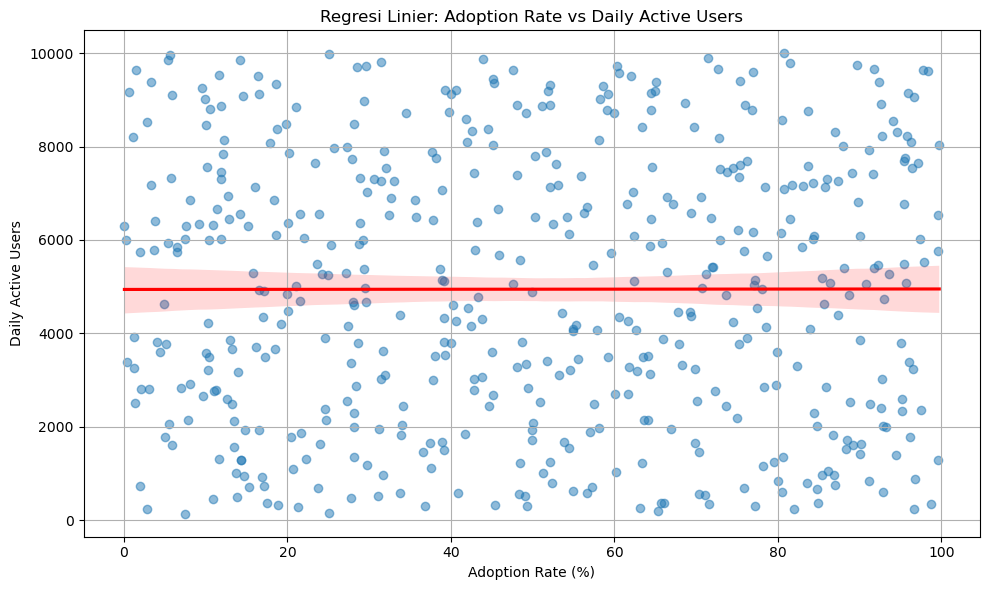

In [10]:
subset = df.sample(n=500, random_state=42)

plt.figure(figsize=(10, 6))
sns.regplot(
    x="adoption_rate",
    y="daily_active_users",
    data=subset,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.5}
)
plt.title("Regresi Linier: Adoption Rate vs Daily Active Users")
plt.xlabel("Adoption Rate (%)")
plt.ylabel("Daily Active Users")
plt.grid(True)
plt.tight_layout()
plt.show()